# Domain classifier (3dshapes): results

**Author**: Maleakhi A. Wijaya  
**Description**: This notebook contains code used to visualise domain classifier experimentation results for the 3dshapes dataset. 

In [12]:
# Load utilities functions
%run ../../scripts/constants.py
%run ../../scripts/3dshapes_utils.py
%run ../../scripts/shift_applicator.py
%run ../../scripts/shift_dimensionality_reductor.py
%run ../../scripts/c2st.py
%run ../../scripts/c2st_utils.py
%run ../../scripts/shift_statistical_test.py

In [13]:
dataset = Dataset.SHAPES3D

## Tables

The tables depict accuracy for distinguishing whether instances come from source or target distributions.

In [14]:
list_labels = ["LDA", "FFNN", "CBM_INDEPENDENT", "CBM_SEQUENTIAL", "CBM_JOINT"]
list_shift_str = ["ko", "gaussian", "all", "adversarial"]
list_shifts = ["Knockout", "Gaussian", "Image", "Adversarial"]

In [15]:
for shift, shift_str in zip(list_shifts, list_shift_str):
    display(Markdown(f"# {shift}"))
    list_dict_results = []
    for label in list_labels:
        list_dict_results.append(load_result_dc(shift_str, label, False, "3dshapes"))
    summary_tables_dc(list_dict_results, list_labels)

# Knockout

## Method: LDA

,10%,50%,100%
Small,0.50,0.50,0.49
Medium,0.50,0.50,0.50
Large,0.52,0.52,0.51


## Method: FFNN

,10%,50%,100%
Small,0.5,0.5,0.5
Medium,0.5,0.5,0.5
Large,0.5,0.5,0.5


## Method: CBM_INDEPENDENT

,10%,50%,100%
Small,0.50,0.50,0.50
Medium,0.50,0.51,0.51
Large,0.52,0.52,0.54


## Method: CBM_SEQUENTIAL

,10%,50%,100%
Small,0.50,0.50,0.50
Medium,0.50,0.51,0.51
Large,0.52,0.51,0.54


## Method: CBM_JOINT

,10%,50%,100%
Small,0.50,0.50,0.50
Medium,0.51,0.51,0.51
Large,0.53,0.53,0.54


# Gaussian

## Method: LDA

,10%,50%,100%
Small,0.5,0.52,0.80
Medium,0.5,0.52,0.90
Large,0.5,0.52,0.99


## Method: FFNN

,10%,50%,100%
Small,0.50,0.50,0.5
Medium,0.50,0.50,0.5
Large,0.51,0.75,1.0


## Method: CBM_INDEPENDENT

,10%,50%,100%
Small,0.5,0.50,0.49
Medium,0.5,0.50,0.50
Large,0.5,0.49,0.50


## Method: CBM_SEQUENTIAL

,10%,50%,100%
Small,0.5,0.50,0.49
Medium,0.5,0.50,0.50
Large,0.5,0.49,0.50


## Method: CBM_JOINT

,10%,50%,100%
Small,0.50,0.50,0.50
Medium,0.50,0.50,0.50
Large,0.51,0.54,0.97


# Image

## Method: LDA

,10%,50%,100%
Small,0.5,0.52,1.00
Medium,0.5,0.52,0.93
Large,0.5,0.52,0.95


## Method: FFNN

,10%,50%,100%
Small,0.50,0.74,1.0
Medium,0.55,0.75,1.0
Large,0.55,0.75,1.0


## Method: CBM_INDEPENDENT

,10%,50%,100%
Small,0.51,0.56,0.99
Medium,0.52,0.66,1.00
Large,0.52,0.67,0.99


## Method: CBM_SEQUENTIAL

,10%,50%,100%
Small,0.51,0.57,0.99
Medium,0.52,0.66,1.00
Large,0.53,0.67,0.99


## Method: CBM_JOINT

,10%,50%,100%
Small,0.50,0.56,0.99
Medium,0.51,0.66,1.00
Large,0.52,0.67,1.00


# Adversarial

## Method: LDA

,10%,50%,100%
Small,0.50,0.50,0.50
Medium,0.52,0.52,0.52
Large,0.83,0.83,0.83


## Method: FFNN

,10%,50%,100%
Small,0.5,0.50,0.50
Medium,0.5,0.51,0.49
Large,1.0,1.00,0.90


## Method: CBM_INDEPENDENT

,10%,50%,100%
Small,0.53,0.53,0.52
Medium,0.67,0.67,0.68
Large,0.99,0.99,0.99


## Method: CBM_SEQUENTIAL

,10%,50%,100%
Small,0.53,0.53,0.52
Medium,0.67,0.66,0.66
Large,0.99,0.99,0.99


## Method: CBM_JOINT

,10%,50%,100%
Small,0.53,0.52,0.52
Medium,0.67,0.68,0.67
Large,0.99,0.99,0.99


## Barplot accuracy

The barplot summarises the accuracy of various methods for each shift type and intensity. (y-axis accuracy, x-axis intensity), each method = bars with different colour. title = shift proportion (3 axes: 10%, 50%, and 100%).

In [5]:
list_labels = ["LDA", "FFNN", "CBM_INDEPENDENT", "CBM_SEQUENTIAL", "CBM_JOINT"]
list_shift_str = ["ko", "gaussian", "all", "adversarial"]
list_shifts = ["Knockout", "Gaussian", "Image", "Adversarial"]

# Knockout

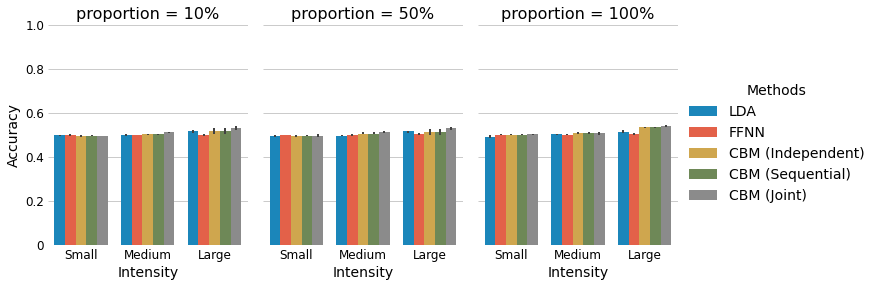

# Gaussian

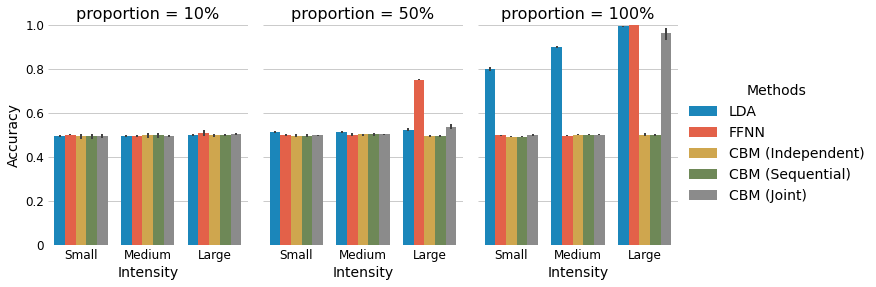

# Image

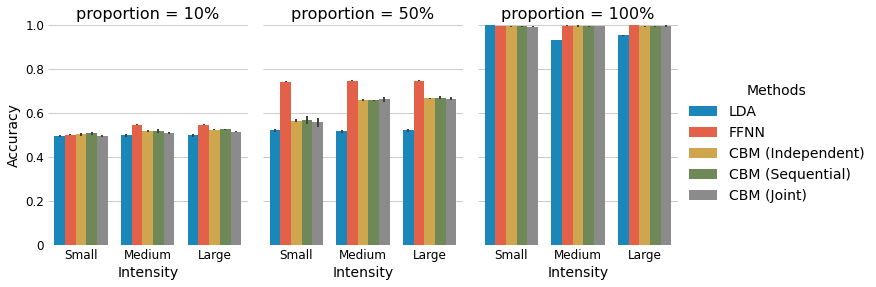

# Adversarial

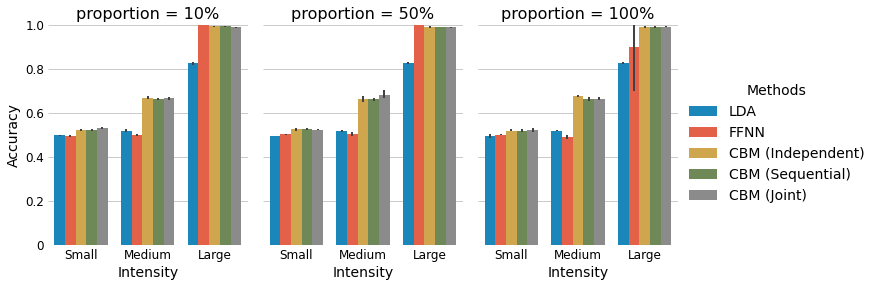

In [6]:
for shift, shift_str in zip(list_shifts, list_shift_str):
    display(Markdown(f"# {shift}"))
    list_dict_results = []
    for label in list_labels:
        list_dict_results.append(load_result_dc(shift_str, label, False, "3dshapes"))
    barplot_accuracy_domain_classifier(list_dict_results, list_labels)

## Most anomalous shift exemplars

Plot the most anomalous and most similar images to the source data.

In [16]:
files_dir = "../../data/3dshapes.h5"
# index 0 = image category
X_train, X_test, y_train, y_test, c_train, c_test = train_test_split_3dshapes(files_dir, 70000, DatasetTask.Task1, 
                                                                               train_size=0.80, class_index=3)

Training samples: 56000
Testing samples: 14000


In [17]:
# Load adversarial samples (we will need this for adversarial
# shift).
adv_samples = np.load("../../data/adversarial_samples/X_adversarial_3dshapes.npy")

In [18]:
# Reshape to appropriate shift input
# It is noteworthy that for efficiency, we represent the images as only 2 dimension
# when we preprocessing (number of instances/ batch size * flatten size).
# When visualising back the image, we need to reshape it back to the original dimension
ORIGINAL_SHAPE = X_test.shape[1:] # constant hold the image original shape
X_test_flatten = deepcopy(X_test.reshape(X_test.shape[0], -1))
X_train_flatten = deepcopy(X_train.reshape(X_train.shape[0], -1))

### FFNN

**Gaussian shift**

In [20]:
ffnn_model = tf.keras.models.load_model("../../models/gaussian_3dshapes_ffnn")
X_test_gaussian = deepcopy(X_test_flatten)
X_test_gaussian, y_test = apply_gaussian_shift(X_test_gaussian, y_test, ShiftIntensity.Large, 0.6)

In [21]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.FFNN, ffnn_model, X_test_gaussian,
                                                            y_test, ORIGINAL_SHAPE)


## Most similar exemplars

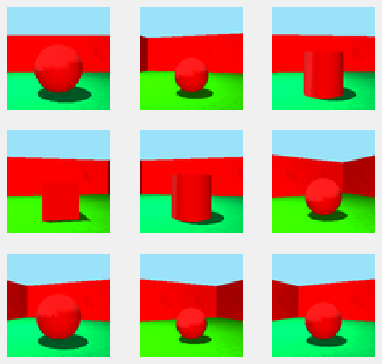

## Most different exemplars

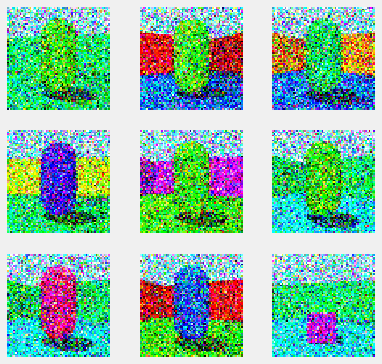

In [22]:
plot_most_different_most_similar_exemplars(X_test_gaussian, most_conf_test_indices, ORIGINAL_SHAPE, 9)

**Image shift**

In [23]:
ffnn_model = tf.keras.models.load_model("../../models/image_3dshapes_ffnn")
X_test_img = deepcopy(X_test_flatten)
X_test_img, y_test = apply_img_shift(X_test_img, y_test, ORIGINAL_SHAPE, 
                                     ShiftIntensity.Large, 0.6, ShiftType.All)

In [24]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.FFNN, ffnn_model, X_test_img,
                                                            y_test, ORIGINAL_SHAPE)


## Most similar exemplars

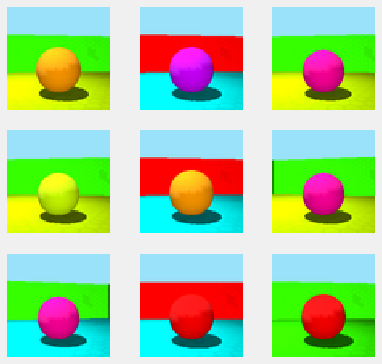

## Most different exemplars

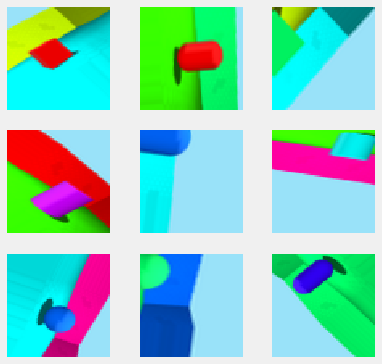

In [25]:
plot_most_different_most_similar_exemplars(X_test_img, most_conf_test_indices, ORIGINAL_SHAPE, 9)

**Knockout shift**

In [26]:
ffnn_model = tf.keras.models.load_model("../../models/ko_3dshapes_ffnn")
X_ko, y_ko, c_ko = deepcopy(X_test_flatten), deepcopy(y_test), deepcopy(c_test)
X_ko, y_ko, c_ko = apply_ko_shift(X_ko, y_ko, c_ko, ShiftIntensity.Large, cl=MAJORITY)

In [27]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.FFNN, ffnn_model, X_ko,
                                                            y_ko, ORIGINAL_SHAPE)


## Most similar exemplars

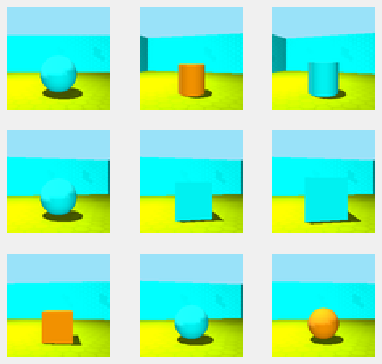

## Most different exemplars

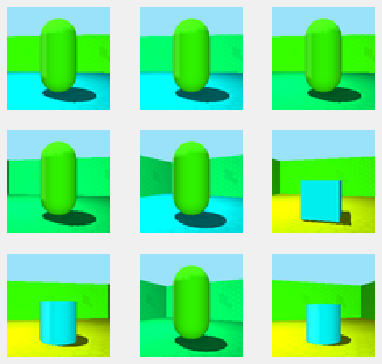

In [28]:
plot_most_different_most_similar_exemplars(X_ko, most_conf_test_indices, ORIGINAL_SHAPE, 9)

**Concept shift**

In [29]:
ffnn_model = tf.keras.models.load_model("../../models/concept_3dshapes_ffnn")
X_cs, y_cs, c_cs = deepcopy(X_test_flatten), deepcopy(y_test), deepcopy(c_test)
X_cs, y_cs, c_cs = apply_concept_shift(X_cs, y_cs, c_cs, 2, ShiftIntensity.Large, cl=MAJORITY)

In [30]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.FFNN, ffnn_model, X_cs,
                                                            y_cs, ORIGINAL_SHAPE)

## Most similar exemplars

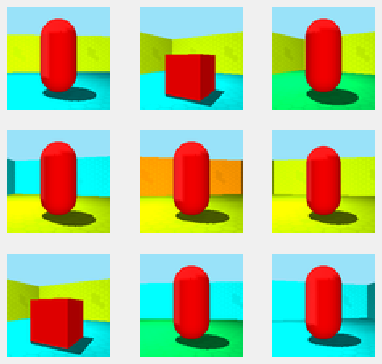

## Most different exemplars

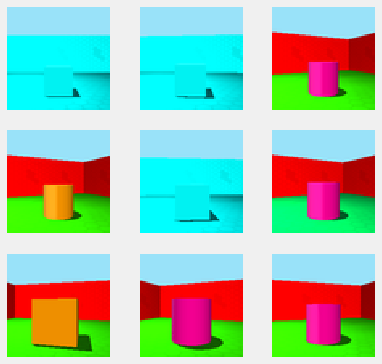

In [31]:
plot_most_different_most_similar_exemplars(X_cs, most_conf_test_indices, ORIGINAL_SHAPE, 9)

**Adversarial shift**

In [32]:
ffnn_model = tf.keras.models.load_model("../../models/adversarial_3dshapes_ffnn")
X_adv, y_adv = deepcopy(X_test_flatten), deepcopy(y_test)
X_adv, y_adv = apply_adversarial_shift(X_adv, y_adv, adv_samples, range(len(X_adv)), ShiftIntensity.Medium)

In [33]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.FFNN, ffnn_model, X_adv,
                                                            y_adv, ORIGINAL_SHAPE)

## Most similar exemplars

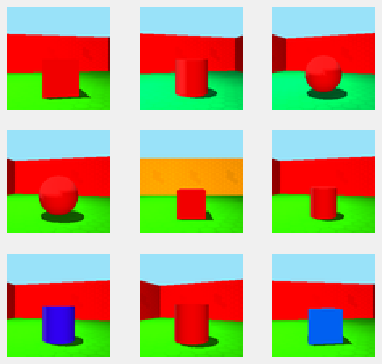

## Most different exemplars

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


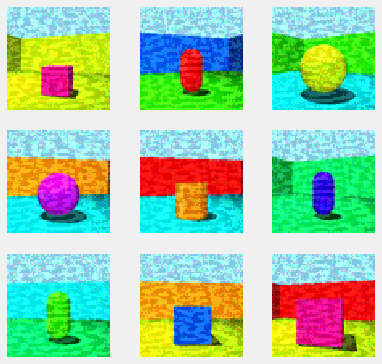

In [34]:
plot_most_different_most_similar_exemplars(X_adv, most_conf_test_indices, ORIGINAL_SHAPE, 9)

### CBM

**Gaussian shift**

In [35]:
cbm_model = tf.keras.models.load_model("../../models/gaussian_3dshapes_cbm")
X_test_gaussian = deepcopy(X_test_flatten)
X_test_gaussian, y_test = apply_gaussian_shift(X_test_gaussian, y_test, ShiftIntensity.Large, 0.6)

In [36]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.CBM, cbm_model, X_test_gaussian,
                                                            y_test, ORIGINAL_SHAPE)

## Most similar exemplars

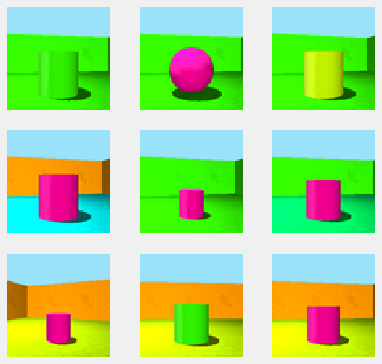

## Most different exemplars

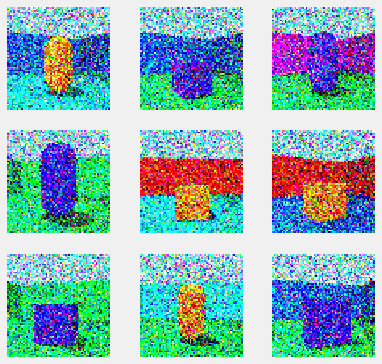

In [37]:
plot_most_different_most_similar_exemplars(X_test_gaussian, most_conf_test_indices, ORIGINAL_SHAPE, 9)

**Image shift**

In [38]:
cbm_model = tf.keras.models.load_model("../../models/image_3dshapes_cbm")
X_test_img = deepcopy(X_test_flatten)
X_test_img, y_test = apply_img_shift(X_test_img, y_test, ORIGINAL_SHAPE, 
                                     ShiftIntensity.Large, 0.6, ShiftType.All)

In [39]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.CBM, cbm_model, X_test_img,
                                                            y_test, ORIGINAL_SHAPE)

## Most similar exemplars

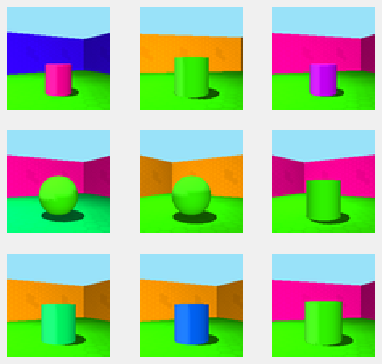

## Most different exemplars

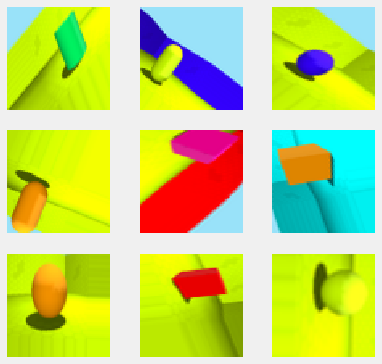

In [40]:
plot_most_different_most_similar_exemplars(X_test_img, most_conf_test_indices, ORIGINAL_SHAPE, 9)

**Knockout shift**

In [41]:
cbm_model = tf.keras.models.load_model("../../models/ko_3dshapes_cbm")
X_ko, y_ko, c_ko = deepcopy(X_test_flatten), deepcopy(y_test), deepcopy(c_test)
X_ko, y_ko, c_ko = apply_ko_shift(X_ko, y_ko, c_ko, ShiftIntensity.Large, cl=MAJORITY)

In [42]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.CBM, cbm_model, X_ko,
                                                            y_ko, ORIGINAL_SHAPE)

## Most similar exemplars

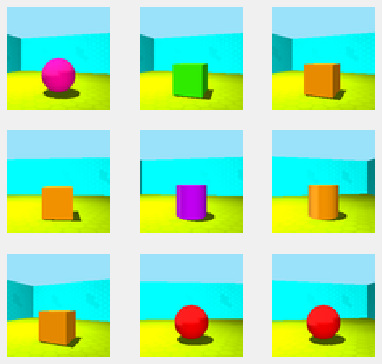

## Most different exemplars

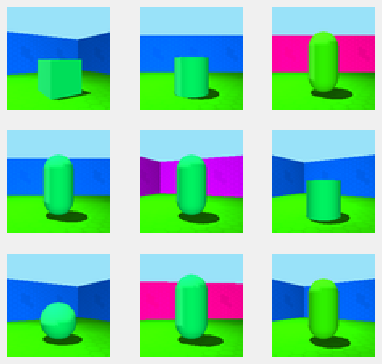

In [43]:
plot_most_different_most_similar_exemplars(X_ko, most_conf_test_indices, ORIGINAL_SHAPE, 9)

**Concept shift**

In [44]:
cbm_model = tf.keras.models.load_model("../../models/concept_3dshapes_cbm")
X_cs, y_cs, c_cs = deepcopy(X_test_flatten), deepcopy(y_test), deepcopy(c_test)
X_cs, y_cs, c_cs = apply_concept_shift(X_cs, y_cs, c_cs, 2, ShiftIntensity.Large, cl=MAJORITY)

In [45]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.CBM, cbm_model, X_cs,
                                                            y_cs, ORIGINAL_SHAPE)

## Most similar exemplars

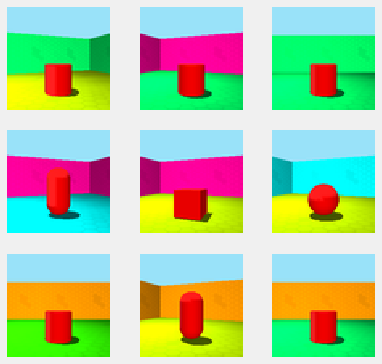

## Most different exemplars

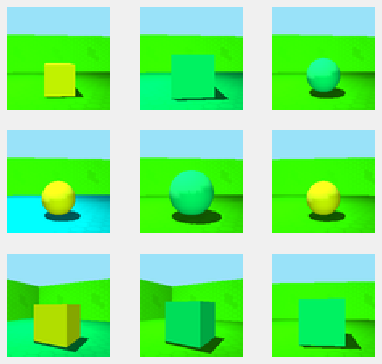

In [46]:
plot_most_different_most_similar_exemplars(X_cs, most_conf_test_indices, ORIGINAL_SHAPE, 9)

**Adversarial shift**

In [47]:
cbm_model = tf.keras.models.load_model("../../models/adversarial_3dshapes_cbm")
X_adv, y_adv = deepcopy(X_test_flatten), deepcopy(y_test)
X_adv, y_adv = apply_adversarial_shift(X_adv, y_adv, adv_samples, range(len(X_adv)), ShiftIntensity.Medium)

In [48]:
# Most anomalous samples
most_conf_test_indices, most_conf_test_perc, detection_result, p_val = most_likely_shifted_samples(ClassifierTwoSampleTest.CBM, cbm_model, X_adv,
                                                            y_adv, ORIGINAL_SHAPE)

## Most similar exemplars

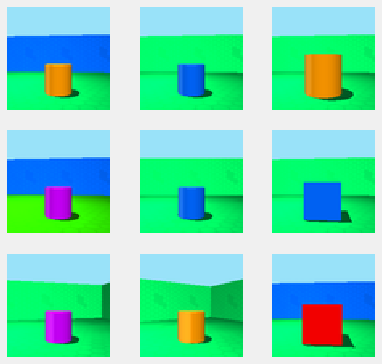

## Most different exemplars

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


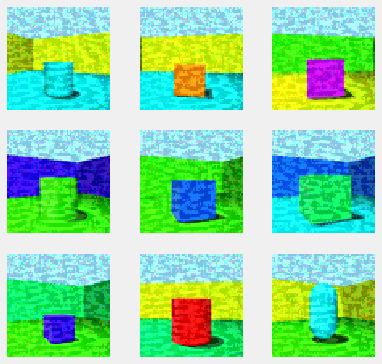

In [49]:
plot_most_different_most_similar_exemplars(X_adv, most_conf_test_indices, ORIGINAL_SHAPE, 9)